In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [10]:
train = pd.read_csv("train.csv")
print(train.shape)

numerics = train.dtypes[train.dtypes!=object].index.tolist()
print(numerics)
print(len(numerics))

n_numerics = train.dtypes[train.dtypes==object].index.tolist()
print(n_numerics)
print(len(n_numerics))

(1460, 81)
['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
38
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'Garage

### Conclusion:

#### There are totally 1460 samples and 81 candidate variables in this training dataset,
#### 38 variables are numeric,and 43s are non-numeric.

# 1、Correlation Analysis

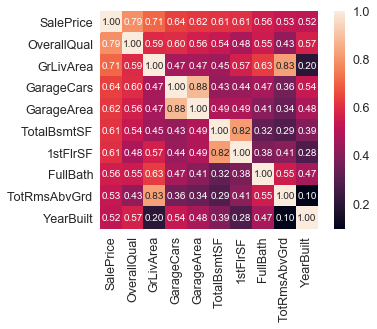

In [12]:
corrmat=train.corr()
cols=corrmat.nlargest(10,"SalePrice")["SalePrice"].index
cc=np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cc, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

### Conclusion:
****
#### The 10 most correlative variables of 'SalePrice' are:
#### 'SalePrice','OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath','TotRmsAbvGrd','YearBuilt' 
****
#### 'GarageCars' and 'GarageArea' have a very high correlation,
#### which means that these 2 variables represent similar informations,
#### donc we can ignore and remove the second one.
#### 'TotalBsmtSF' and '1stFlrSF' are in the same situation.
****
#### so the 4 most important variables we should take into consideration are:
#### 'OverallQual','GrLivArea','GarageCars','TotalBsmtSF'

# 2、Missing-data Analysis

In [19]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data[missing_data['Total']>0]

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


### Conclusion:

#### There are 19 variables have missing-data,
####  6 variables have a missing-data percentage more than 15%,we can delete them directly.
#### 'Electrical' has only 1 missing-data,so we can just exclude the missing sample.
#### For other variables we need to make decisions according to the reality and their mutual relations. 

# 3、Outliers Analysis

In [21]:
saleprice_scaled = StandardScaler().fit_transform(train['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83870376]
 [-1.83352844]
 [-1.80092766]
 [-1.78329881]
 [-1.77448439]
 [-1.62337999]
 [-1.61708398]
 [-1.58560389]
 [-1.58560389]
 [-1.5731    ]]

outer range (high) of the distribution:
[[3.82897043]
 [4.04098249]
 [4.49634819]
 [4.71041276]
 [4.73032076]
 [5.06214602]
 [5.42383959]
 [5.59185509]
 [7.10289909]
 [7.22881942]]


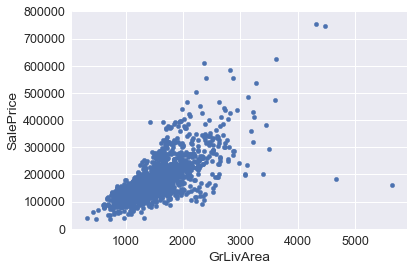

In [23]:
var = 'GrLivArea'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

### Conclusion:
#### We take the variable 'GrLivArea' as an example:
#### first of all,we need to standardize our data,
#### that means we convert our data values to have a mean of 0 and a standard deviation of 1.
****
#### we notice that there are 2 sample have deviations even more than 7,far from the average of 1,
#### we can define them as 2 outliers and pay much more attention.
****
#### in the scatter plot, we can observe 2 points whose x values are bigger than 4000.
#### they don't follow the crowd and obviously against the normal trend,
#### so we can take them away from the training dataset. 

# 4、Overall Analysis

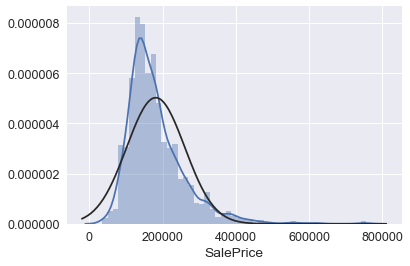

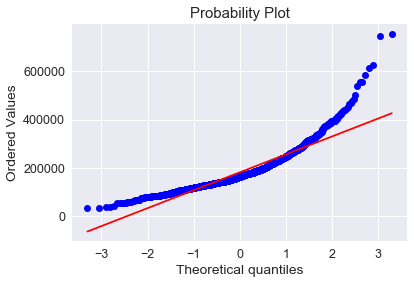

In [26]:
sns.distplot(train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([10.46024211, 10.47194981, 10.54270639, ..., 13.34550693,
         13.5211395 , 13.53447303])),
 (0.3982622308161888, 12.024050901109383, 0.9953761475636613))

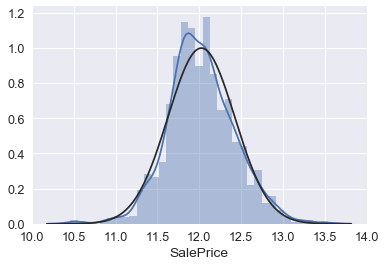

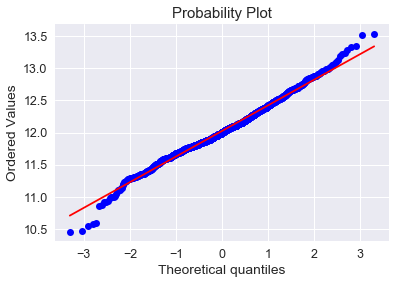

In [27]:
train['SalePrice']=np.log(train['SalePrice'])

sns.distplot(train['SalePrice'],fit=norm)
plt.figure()
stats.probplot(train['SalePrice'],plot=plt)

### Conclusion:
#### Taking the variable 'SalePrice' as an example:
#### after comparing the training dataset's distribution with the normal distribution,
#### we found that the dataset's distribution has a higher kurtosis and positive skewness.
#### The phenomenon indicates that we need to lower dataset's deviation through log method.
#### As seeing,we overcomed this problem successfully in using log method,
#### that means the variable 'SalePrice' is acceptable for us and it won't trigger more troubles.